## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [2]:
#df = pd.read_csv(r'D:\upgrad\ML_Practice\CreditcardFaurd\creditcard.csv')
df = pd.read_csv(r'creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [4]:
classes=df['Class'].value_counts()
print(classes)
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share)
print(fraud_share)

0    284315
1       492
Name: Class, dtype: int64
99.82725143693798
0.1727485630620034


Text(0.2, 0.5, '99.83%')

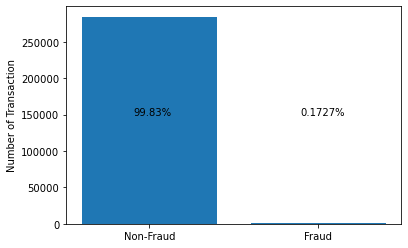

In [5]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.bar(['Non-Fraud','Fraud'],classes)
plt.ylabel("Number of Transaction")
plt.annotate("{0:.4}%".format(fraud_share),(0.7, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(normal_share),(0.2, 0.5), xycoords='axes fraction')


0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64
0          0.000000
1          0.000000
2          0.000278
3          0.000278
4          0.000556
            ...    
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time, Length: 284807, dtype: float64


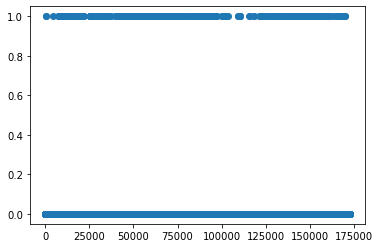

In [6]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(df.Time,df.Class)
print(df.Time)
print(df.Time/(60*60))

Text(0, 0.5, 'Class')

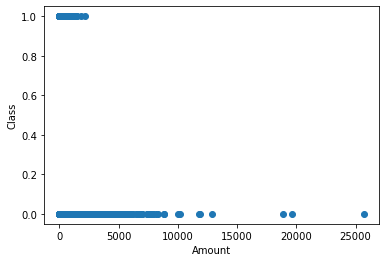

In [7]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(df.Amount,df.Class)
plt.xlabel("Amount")
plt.ylabel("Class")

In [8]:
# Drop unnecessary columns
df.drop(['Time'],axis=1,inplace=True)

### Splitting the data into train & test data

In [9]:
y= df.Class
df.drop('Class',axis=1,inplace=True)


In [10]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(df,y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [11]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
375
117


### Plotting the distribution of a variable

(array([ 1.,  0.,  0., ..., 33.,  5.,  4.]),
 array([-46.8550472 , -46.83196201, -46.80887681, ...,   2.4087596 ,
          2.4318448 ,   2.45492999]),
 <a list of 2136 Patch objects>)

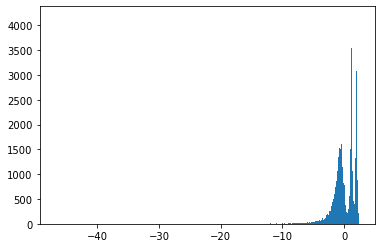

In [12]:
# plot the histogram of a variable from the dataset to see the skewness
import matplotlib.pyplot as plt

plt.hist(X_train.iloc[:,0], bins=int(X_train.shape[0]/100))

In [13]:
X_train.iloc[:,0]

282280   -0.463674
84566    -2.050232
267945   -2.910537
1109     -0.443986
234206   -1.084160
            ...   
32384    -0.520184
49597     1.432626
219404    1.905719
13638     1.221701
191595    1.449959
Name: V1, Length: 213605, dtype: float64

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [14]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn import preprocessing
powerTransformer=preprocessing.PowerTransformer(copy=False)
powerTransformer.fit_transform(X_train)
powerTransformer.transform(X_test)

array([[-0.7098621 ,  0.33742381, -0.56078477, ...,  0.18782822,
        -0.14284714,  0.76895197],
       [-1.01825147,  0.03070744, -0.15051793, ..., -0.35960824,
         0.06840878,  1.48227612],
       [ 1.66579877, -0.8712172 , -0.77557483, ...,  0.00223718,
        -0.16543974, -0.42851857],
       ...,
       [ 0.61323429,  0.03653191,  0.14325933, ...,  0.07867813,
         0.0502764 , -1.26560978],
       [ 1.25765008, -0.36967428, -0.23777954, ...,  0.14155275,
        -0.02745715,  0.43988794],
       [ 0.12803339, -0.89828476,  0.56897286, ..., -0.20356839,
         0.20866813,  1.5057891 ]])

(array([1., 0., 0., ..., 1., 0., 2.]),
 array([-7.65881167, -7.65435185, -7.64989203, ...,  1.85844905,
         1.86290887,  1.86736869]),
 <a list of 2136 Patch objects>)

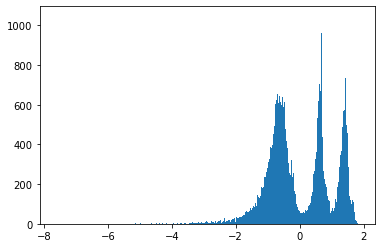

In [15]:
# plot the histogram of a variable from the dataset again to see the result 
plt.hist(X_train.iloc[:,0], bins=int(X_train.shape[0]/100))

## Model Building
- Build different models on the imbalanced dataset and see the result

In [16]:
# Logistic Regression
num_split=3
skf=model_selection.StratifiedKFold(n_splits=num_split,shuffle=True,random_state=0)
from sklearn import linear_model #import the package

num_C = [0.001,.01,.1,1.0,10.0,100.0,1000.0]  
cv_num = 0
auc=np.zeros((len(num_C),num_split))


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [17]:
#perform cross validation with Logistic Regression
cv_num=0
for trainindex,testindex in skf.split(X_train,y_train):
    xtraincv,xtestcv=X_train.iloc[trainindex],X_train.iloc[testindex]
    ytraincv,ytestcv=y_train.iloc[trainindex],y_train.iloc[testindex]
    for id,val in enumerate(num_C):
        lr=linear_model.LogisticRegression(C=val, random_state=0, solver='lbfgs', max_iter=1000, n_jobs=-1)
        lr.fit(xtraincv,ytraincv)
        score=lr.predict_proba(xtestcv)        
        auc[id,cv_num]=metrics.roc_auc_score(y_true=ytestcv,y_score=score[:,1])
        print('C_val =', val, '; auc =', auc[id, cv_num], '; cv_num =', cv_num)
    cv_num=cv_num+1

print(auc)
mean_auc = np.mean(auc, axis=1)
print('Best C:', num_C[np.argmax(mean_auc)])
print('Best auc corresponding to Best C:', mean_auc[np.argmax(mean_auc)])


C_val = 0.001 ; auc = 0.9888753886629993 ; cv_num = 0
C_val = 0.01 ; auc = 0.9912336198770348 ; cv_num = 0
C_val = 0.1 ; auc = 0.987310663083698 ; cv_num = 0
C_val = 1.0 ; auc = 0.9856450891286914 ; cv_num = 0
C_val = 10.0 ; auc = 0.985428535250503 ; cv_num = 0
C_val = 100.0 ; auc = 0.98540534912841 ; cv_num = 0
C_val = 1000.0 ; auc = 0.985403210602586 ; cv_num = 0
C_val = 0.001 ; auc = 0.983754857408163 ; cv_num = 1
C_val = 0.01 ; auc = 0.9804260731319554 ; cv_num = 1
C_val = 0.1 ; auc = 0.9790688971115831 ; cv_num = 1
C_val = 1.0 ; auc = 0.978361495279767 ; cv_num = 1
C_val = 10.0 ; auc = 0.9782704391012563 ; cv_num = 1
C_val = 100.0 ; auc = 0.9782554694204877 ; cv_num = 1
C_val = 1000.0 ; auc = 0.978255694528469 ; cv_num = 1
C_val = 0.001 ; auc = 0.9582809387134897 ; cv_num = 2
C_val = 0.01 ; auc = 0.9647880015757782 ; cv_num = 2
C_val = 0.1 ; auc = 0.9685285609769825 ; cv_num = 2
C_val = 1.0 ; auc = 0.9691056334064946 ; cv_num = 2
C_val = 10.0 ; auc = 0.9691726039732117 ; cv_num = 

In [18]:
# perform cross validation with decision tree
from sklearn import tree
num_cv_splits=3
num_depth = range(2, 7)
num_min_samples_leaf = [30,50,100]
num_min_samples_split = [2,31]
auc = np.zeros((len(num_depth)*len(num_min_samples_leaf)*len(num_min_samples_split), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    for depth_id, depth in enumerate(num_depth):
        for min_samples_leaf_id, min_samples_leaf in enumerate(num_min_samples_leaf):
            for min_samples_split_id, min_samples_split in enumerate(num_min_samples_split):
                clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                        min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, random_state=0)
                clf.fit(X_train_cv, y_train_cv)
                auc_id = depth_id*len(num_min_samples_leaf)*len(num_min_samples_split)+\
                            min_samples_leaf_id*len(num_min_samples_split)+min_samples_split_id
                auc[auc_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
                print('depth =', depth, '; min_samples_leaf =', min_samples_leaf, '; min_samples_split =',
                      min_samples_split, '; auc =', auc[auc_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
depth_id = np.argmax(mean_auc)//(len(num_min_samples_leaf)*len(num_min_samples_split))
min_samples_leaf_id = (np.argmax(mean_auc) - depth_id*len(num_min_samples_leaf)*len(num_min_samples_split))//len(
                       num_min_samples_split)
min_samples_split_id = (np.argmax(mean_auc) - depth_id*len(num_min_samples_leaf)*len(num_min_samples_split))%len(
                       num_min_samples_split)
print('Best depth:', num_depth[depth_id])
print('Best min_samples_leaf:', num_min_samples_leaf[min_samples_leaf_id])
print('Best min_samples_split:', num_min_samples_leaf[min_samples_split_id])
print('Best auc corresponding to Best depth, min_samples_leaf & min_samples_split :', mean_auc[np.argmax(mean_auc)])

depth = 2 ; min_samples_leaf = 30 ; min_samples_split = 2 ; auc = 0.9357416323142508 ; cv_num = 0
depth = 2 ; min_samples_leaf = 30 ; min_samples_split = 31 ; auc = 0.9357416323142508 ; cv_num = 0
depth = 2 ; min_samples_leaf = 50 ; min_samples_split = 2 ; auc = 0.9357329093799681 ; cv_num = 0
depth = 2 ; min_samples_leaf = 50 ; min_samples_split = 31 ; auc = 0.9357329093799681 ; cv_num = 0
depth = 2 ; min_samples_leaf = 100 ; min_samples_split = 2 ; auc = 0.9396889570465833 ; cv_num = 0
depth = 2 ; min_samples_leaf = 100 ; min_samples_split = 31 ; auc = 0.9396889570465833 ; cv_num = 0
depth = 3 ; min_samples_leaf = 30 ; min_samples_split = 2 ; auc = 0.9442374889204664 ; cv_num = 0
depth = 3 ; min_samples_leaf = 30 ; min_samples_split = 31 ; auc = 0.9442374889204664 ; cv_num = 0
depth = 3 ; min_samples_leaf = 50 ; min_samples_split = 2 ; auc = 0.9442098569157392 ; cv_num = 0
depth = 3 ; min_samples_leaf = 50 ; min_samples_split = 31 ; auc = 0.9442098569157392 ; cv_num = 0
depth = 3 ; m

In [25]:
num_cv_splits=3
from sklearn import ensemble
from sklearn import metrics
intial_trees=801
num_trees=899
tree_increment=1
trees=range(intial_trees,num_trees+1,tree_increment)
auc=np.zeros((len(trees),num_cv_splits))
cv_num=0
for train_index,test_index in skf.split(X_train,y_train):
    xtrain_cv,xtest_cv=X_train.iloc[train_index],X_train.iloc[test_index]
    ytrain_cv,ytest_cv=y_train.iloc[train_index],y_train.iloc[test_index]
    clf=ensemble.RandomForestClassifier(criterion='entropy',min_samples_leaf=30,warm_start=True,n_jobs=-1,random_state=0)
    for tree_id,tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(xtrain_cv,ytrain_cv)
        auc[id,cv_num]=metrics.roc_auc_score(y_true=ytest_cv,y_score=clf.predict_proba(xtest_cv)[:,1])
        print('num_trees =', tree, '; auc =', auc[tree_id, cv_num], '; cv_num =', cv_num)
    cv_num=cv_num+1
    


num_trees = 801 ; auc = 0.9696211714056587 ; cv_num = 0
num_trees = 802 ; auc = 0.0 ; cv_num = 0
num_trees = 803 ; auc = 0.0 ; cv_num = 0
num_trees = 804 ; auc = 0.0 ; cv_num = 0
num_trees = 805 ; auc = 0.0 ; cv_num = 0
num_trees = 806 ; auc = 0.0 ; cv_num = 0
num_trees = 807 ; auc = 0.0 ; cv_num = 0
num_trees = 808 ; auc = 0.0 ; cv_num = 0
num_trees = 809 ; auc = 0.0 ; cv_num = 0
num_trees = 810 ; auc = 0.0 ; cv_num = 0
num_trees = 811 ; auc = 0.0 ; cv_num = 0
num_trees = 812 ; auc = 0.0 ; cv_num = 0
num_trees = 813 ; auc = 0.0 ; cv_num = 0
num_trees = 814 ; auc = 0.0 ; cv_num = 0
num_trees = 815 ; auc = 0.0 ; cv_num = 0
num_trees = 816 ; auc = 0.0 ; cv_num = 0
num_trees = 817 ; auc = 0.0 ; cv_num = 0
num_trees = 818 ; auc = 0.0 ; cv_num = 0
num_trees = 819 ; auc = 0.0 ; cv_num = 0
num_trees = 820 ; auc = 0.0 ; cv_num = 0
num_trees = 821 ; auc = 0.0 ; cv_num = 0
num_trees = 822 ; auc = 0.0 ; cv_num = 0
num_trees = 823 ; auc = 0.0 ; cv_num = 0
num_trees = 824 ; auc = 0.0 ; cv_num = 0
n

In [26]:
mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])

Best num_trees: 801
Best auc corresponding to Best num_trees : 0.9776175656543614


In [27]:
initial_trees = 801
num_trees = 899
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0)
    for tree_id, tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('num_trees =', tree, '; auc =', auc[tree_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])

num_trees = 801 ; auc = 0.9712640094545352 ; cv_num = 0
num_trees = 802 ; auc = 0.9712558492902066 ; cv_num = 0
num_trees = 803 ; auc = 0.9712495462667248 ; cv_num = 0
num_trees = 804 ; auc = 0.9712423990883126 ; cv_num = 0
num_trees = 805 ; auc = 0.9712308060272663 ; cv_num = 0
num_trees = 806 ; auc = 0.9712211263840623 ; cv_num = 0
num_trees = 807 ; auc = 0.9711995160178396 ; cv_num = 0
num_trees = 808 ; auc = 0.9711923125624322 ; cv_num = 0
num_trees = 809 ; auc = 0.9711831956891821 ; cv_num = 0
num_trees = 810 ; auc = 0.9711767801117097 ; cv_num = 0
num_trees = 811 ; auc = 0.9711678883464412 ; cv_num = 0
num_trees = 812 ; auc = 0.9711573645483067 ; cv_num = 0
num_trees = 813 ; auc = 0.9711545506985382 ; cv_num = 0
num_trees = 814 ; auc = 0.9711377238769221 ; cv_num = 0
num_trees = 815 ; auc = 0.971131927346399 ; cv_num = 0
num_trees = 816 ; auc = 0.9711252303839495 ; cv_num = 0
num_trees = 817 ; auc = 0.97111768926657 ; cv_num = 0
num_trees = 818 ; auc = 0.9711077845153848 ; cv_num

In [17]:
# XGBoost

from xgboost import XGBClassifier

num_depth = [3, 4]
learning_rate = [0.1, 0.2, 0.3]
initial_trees = 1126
num_trees = 500
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees)*len(num_depth)*len(learning_rate), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    for lr_id, lr in enumerate(learning_rate):
        for depth_id, depth in enumerate(num_depth):
            clf = XGBClassifier(learning_rate=lr, max_depth=depth, min_child_weight=30, n_estimators=initial_trees,
                                n_jobs=56)
            clf.fit(X_train_cv, y_train_cv)
            clf.save_model('lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(initial_trees)+'_cv_num_'+str(cv_num)+\
                           '.model')
            auc_id = lr_id*len(num_depth)*len(trees)+depth_id*len(trees)
            auc[auc_id, cv_num] = metrics.roc_auc_score(
                y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
            print('learning rate =', lr, '; depth =', depth, '; num_trees = ', initial_trees, '; auc =', auc[auc_id,
                    cv_num], '; cv_num =', cv_num)
            for tree_id,tree in enumerate(trees[1:]):
                clf = XGBClassifier(learning_rate=lr, max_depth=depth, min_child_weight=30,
                                    n_estimators=tree_increment, n_jobs=56)
                clf.fit(X_train_cv, y_train_cv, xgb_model=(
                    'lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(trees[tree_id])+'_cv_num_'+str(cv_num)+'.model'))
                clf.save_model('lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(tree)+'_cv_num_'+str(cv_num)+'.model')
                auc_id = lr_id*len(num_depth)*len(trees)+depth_id*len(trees)+tree_id+1
                auc[auc_id, cv_num] = metrics.roc_auc_score(
                    y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
                print('learning rate =', lr, '; depth =', depth, '; num_trees =', tree, '; auc =', auc[auc_id,
                        cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
lr_id = np.argmax(mean_auc)//(len(num_depth)*len(trees))
depth_id = (np.argmax(mean_auc) - lr_id*len(num_depth)*len(trees))//len(trees)
tree_id = (np.argmax(mean_auc) - lr_id*len(num_depth)*len(trees))%len(trees)
print('Best Learning Rate:', learning_rate[lr_id])
print('Best Depth:', num_depth[depth_id])
print('Best Trees:', trees[tree_id])
print('Best auc corresponding to Best Learning Rate, Depth & Trees :', mean_auc[np.argmax(mean_auc)])

ModuleNotFoundError: No module named 'xgboost'

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [19]:
clf = ___  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
print --> #print the evaluation score on the X_test by choosing the best evaluation metric

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(--> #print the evaluation score on the X_test by choosing the best evaluation metric)? (<ipython-input-19-03f3db1ef6b7>, line 3)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = ______  #--> list of values
cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [ ]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)